In [1]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

In [3]:
df_commute = pd.read_csv('https://raw.githubusercontent.com/rwedell/data/master/commute_data.csv')
df_commute.sort_values('State').head()

,State ID,State,Drive Alone,Carpool,Walk,Public Transportation,Other Means,Work at Home
21,1,Alabama,86.3,7.9,1.1,0.3,1.0,3.5
19,2,Alaska,68.0,12.3,7.8,1.2,5.5,5.3
30,4,Arizona,76.1,11.0,1.7,1.7,2.7,6.8
47,5,Arkansas,82.6,10.4,1.5,0.4,1.3,3.7
48,6,California,73.8,10.0,2.6,4.9,2.6,6.0


In [4]:
df_drive_alone = df_commute.filter(items=['State ID','State','Drive Alone'])
df_drive_alone.rename(columns={'Drive Alone':'Rate'},inplace=True)
df_drive_alone.insert(3,'Commute Type','Drive Alone')
df_drive_alone.sort_values('State').head()

,State ID,State,Rate,Commute Type
21,1,Alabama,86.3,Drive Alone
19,2,Alaska,68.0,Drive Alone
30,4,Arizona,76.1,Drive Alone
47,5,Arkansas,82.6,Drive Alone
48,6,California,73.8,Drive Alone


In [5]:
df_carpool = df_commute.filter(items=['State ID','State','Carpool'])
df_carpool.rename(columns={'Carpool':'Rate'},inplace=True)
df_carpool.insert(3,'Commute Type','Carpool')

df_walk = df_commute.filter(items=['State ID','State','Walk'])
df_walk.rename(columns={'Walk':'Rate'},inplace=True)
df_walk.insert(3,'Commute Type','Walk')

df_public_transportation = df_commute.filter(items=['State ID','State','Public Transportation'])
df_public_transportation.rename(columns={'Public Transportation':'Rate'},inplace=True)
df_public_transportation.insert(3,'Commute Type','Public Transportation')

df_other_means = df_commute.filter(items=['State ID','State','Other Means'])
df_other_means.rename(columns={'Other Means':'Rate'},inplace=True)
df_other_means.insert(3,'Commute Type','Other Means')

df_work_at_home = df_commute.filter(items=['State ID','State','Work at Home'])
df_work_at_home.rename(columns={'Work at Home':'Rate'},inplace=True)
df_work_at_home.insert(3,'Commute Type','Work at Home')



In [6]:
df_commute_stacked = pd.concat(
    [df_drive_alone,df_carpool,df_walk,df_public_transportation,df_other_means,df_work_at_home])
df_commute_stacked.sort_values(['State','Rate'],ascending=[True,False],inplace=True)
df_commute_stacked.head(12)

,State ID,State,Rate,Commute Type
21,1,Alabama,86.3,Drive Alone
21,1,Alabama,7.9,Carpool
21,1,Alabama,3.5,Work at Home
21,1,Alabama,1.1,Walk
21,1,Alabama,1.0,Other Means
21,1,Alabama,0.3,Public Transportation
19,2,Alaska,68.0,Drive Alone
19,2,Alaska,12.3,Carpool
19,2,Alaska,7.8,Walk
19,2,Alaska,5.5,Other Means


In [7]:
df_dc_commute = df_commute_stacked.loc[df_commute_stacked['State'] == 'District of Columbia']
df_dc_commute

,State ID,State,Rate,Commute Type
7,11,District of Columbia,34.4,Public Transportation
7,11,District of Columbia,34.2,Drive Alone
7,11,District of Columbia,13.3,Walk
7,11,District of Columbia,6.8,Other Means
7,11,District of Columbia,6.1,Work at Home
7,11,District of Columbia,5.1,Carpool


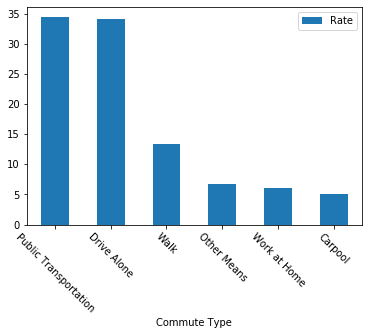

In [21]:
#enable_plotly_in_cell()
#data = [go.Bar(x=df_dc_commute['Commute Type'],
#               y=df_dc_commute['Rate'])]
#layout = go.Layout(title='District of Columbia Commute Type Rate')
#fig = go.Figure(data=data,layout=layout)
#iplot(fig)

#fig = px.bar(df_dc_commute, x=df_dc_commute['Commute Type'], y=df_dc_commute['Rate'])
#fig.show("png")

ax = df_dc_commute.plot(x='Commute Type',y='Rate',kind='bar',rot=-45)
ax